## MNIST Dataset
http://yann.lecun.com/exdb/mnist/

In [1]:
# Adapted from 
import gzip
with gzip.open('data/t10k-images-idx3-ubyte.gz', 'rb') as f:
    file_content = f.read()

In [2]:
file_content[0:10]

b"\x00\x00\x08\x03\x00\x00'\x10\x00\x00"

In [3]:
type(file_content)

bytes

### Reading the file byte by byte
#### Little and big Endian

In [4]:
int.from_bytes(file_content[0:4], byteorder='big')

2051

In [5]:
int.from_bytes(file_content[4:8], byteorder='big')

10000

In [6]:
int.from_bytes(file_content[12:16], byteorder='big')

28

In [7]:
int.from_bytes(file_content[278:279], byteorder='big')

163

## Reading a single image

In [8]:
l = file_content[16:800]

In [9]:
type(l)

bytes

In [12]:
import numpy as np

image = ~np.array(list(file_content[16:800])).reshape(28,28).astype(np.uint8)

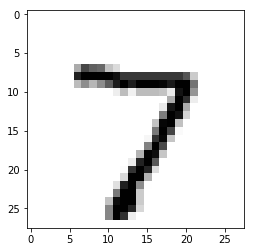

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(image, cmap='gray')

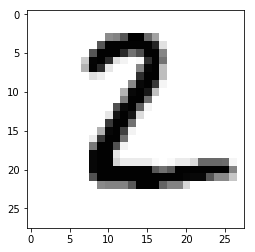

In [16]:
image1 = ~np.array(list(file_content[800:1584])).reshape(28,28).astype(np.uint8)

plt.imshow(image1, cmap='gray')

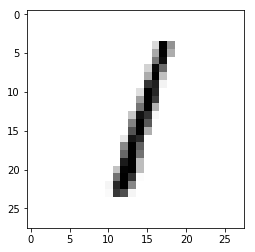

In [20]:
image2 = ~np.array(list(file_content[1584:2368])).reshape(28,28).astype(np.uint8)

plt.imshow(image2, cmap='gray')

## Reading a label

In [14]:
# Adapted from: https://docs.python.org/3/library/gzip.html

import gzip

with gzip.open('data/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    labels = f.read()

In [15]:
int.from_bytes(labels[8:9], byteorder="big")

7

In [21]:
int.from_bytes(labels[9:10], byteorder="big")

2

In [22]:
int.from_bytes(labels[10:11], byteorder="big")

1